In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
rho = 1.
gamma = 0.01
nxx = 101      # velocity nodes
nx = nxx - 1  # centroid nodes 
nyy = 101      
ny = nyy - 1
Lx = 1.
Ly = 1.
dx = Lx/nx
dy = Ly/ny
x = np.linspace(0+dx/2, Lx-dx/2, nx)
y = np.linspace(0+dy/2, Ly-dy/2, ny)
eps = 1e-4
phi_west = np.zeros(ny)
phi_west = -y/Ly + 1 
xx = np.linspace(0, Lx, nxx)
yy = np.linspace(0, Ly, nyy)
XX, YY = np.meshgrid(xx, yy)
Ac_E = np.zeros((nx,ny))
Ac_W = np.zeros((nx,ny))
Ac_N = np.zeros((nx,ny))
Ac_S = np.zeros((nx,ny))
Ac_P = np.zeros((nx,ny))
Ad_E = np.zeros((nx,ny))
Ad_W = np.zeros((nx,ny))
Ad_N = np.zeros((nx,ny))
Ad_S = np.zeros((nx,ny))
Ad_P = np.zeros((nx,ny))
At_E = np.zeros((nx,ny))
At_W = np.zeros((nx,ny))
At_N = np.zeros((nx,ny))
At_S = np.zeros((nx,ny))
At_P = np.zeros((nx,ny))
phi = np.zeros((nx, ny))
u = xx
v = -yy
uu = XX.T
vv = -YY.T
lam_w = np.zeros((nx,ny))
lam_e = np.zeros((nx,ny))
lam_n = np.zeros((nx,ny))
lam_s = np.zeros((nx,ny))
m_w = np.zeros((nx,ny))
m_e = np.zeros((nx,ny))
m_n = np.zeros((nx,ny))
m_s = np.zeros((nx,ny))

err_tol = 1e-5
nsteps = 500
m_zeros = np.zeros((nx, ny))
# Internal nodes excluding the boundaries VERIFIED
for i in range(1, nx-1):
    for j in range (1, ny-1):
        # Calculate convection coefficients
        lam_w[i,j] = (xx[i] - x[i])/(x[i-1] - x[i])
        lam_e[i,j] = (xx[i+1] - x[i])/(x[i+1] - x[i])
        lam_n[i,j] = (yy[j+1] - y[j])/(y[j+1] - y[j])
        lam_s[i,j] = (yy[j] - y[j])/(y[j-1] - y[j])
        m_w[i,j] = rho*uu[i,j]*dy
        m_e[i,j] = rho*uu[i+1,j]*dy
        m_n[i,j] = rho*vv[i,j+1]*dx
        m_s[i,j] = rho*vv[i,j]*dx
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = -m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = -m_s[i,j]*lam_s[i,j]
        #Ac_P[i,j] = 

        # Calculate diffusion coefficients
        Ad_E[i,j] = gamma*dy/(x[i+1]-x[i])
        Ad_W[i,j] = gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] = gamma*dx/(y[j+1]-y[j])
        Ad_S[i,j] = gamma*dx/(y[j]-y[j-1])

In [0]:

# West boundary, prescribed phi using a half-interval 
for j in range(ny):
    i = 0
    lam_w[i,j] = (xx[0]-x[0])/(xx[0]-x[0])
    lam_e[i,j] = (xx[1]-x[0])/(x[1]-x[0])
    m_w[i,j] = rho*uu[0,j]*dy   
    m_e[i,j] = rho*uu[1,j]*dy
    if j == 0:  ## SW corner node ##
        lam_s[i,j] = (yy[j]-y[j])/(yy[j]-y[j])
        lam_n[i,j] = (yy[j+1]-y[j])/(y[j+1]-y[j])
        m_n[i,j] = rho*vv[0,j+1]*dx
        m_s[i,j] = rho*vv[0,j]*dx
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = -m_s[i,j]*lam_s[i,j]
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = -m_w[i,j]*lam_w[i,j]
        
        Ad_S[i,j] = 0. #-gamma*dx/(y[j]-yy[j])
        Ad_E[i,j] = gamma*dy/(x[1]-x[0])
        Ad_W[i,j] = gamma*dy/(x[0]-xx[0])
        Ad_N[i,j] = gamma*dx/(y[j+1]-y[j])
    elif j == ny-1:  ## NW corner node ##
        lam_n[i,j] = (yy[j+1]-y[j])/(yy[j+1]-y[j])
        lam_s[i,j] = (yy[j]-y[j])/(y[j-1]-y[j])
        m_n[i,j] = rho*vv[0,j+1]*dx
        m_s[i,j] = rho*vv[0,j]*dx
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = -m_s[i,j]*lam_s[i,j]
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = -m_w[i,j]*lam_w[i,j]
        
        Ad_N[i,j] = gamma*dx/(yy[j+1]-y[j])
        Ad_E[i,j] = gamma*dy/(x[i+1]-x[i])
        Ad_W[i,j] = gamma*dy/(x[i]-xx[i])
        Ad_S[i,j] = gamma*dx/(y[j]-y[j-1])
    else:
        lam_n[i,j] = (yy[j+1]-y[j])/(y[j+1]-y[j])
        lam_s[i,j] = (yy[j]-y[j])/(y[j-1]-y[j])
        m_n[i,j] = rho*vv[0,j+1]*dx
        m_s[i,j] = rho*vv[0,j]*dx
        
        # Convection coefficients
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = -m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = -m_s[i,j]*lam_s[i,j]

        # Diffusion coefficients
        Ad_E[i,j] = gamma*dy/(x[1]-x[0])
        Ad_W[i,j] = gamma*dy/(x[0]-xx[0])
        Ad_N[i,j] = gamma*dx/(y[j+1]-y[j])
        Ad_S[i,j] = gamma*dx/(y[j]-y[j-1])

In [0]:
# North boundary, prescribed phi using a half-interval 
for i in range(1,nx):
    j = -1
    lam_n[i,j] = (yy[-1]-y[-1])/(yy[-1]-y[-1])
    lam_s[i,j] = (yy[-2]-y[-1])/(y[-2]-y[-1])
    m_n[i,j] = rho*vv[i,-1]*dx
    m_s[i,j] = rho*vv[i,-2]*dx
    # if i == 0: ## NW corner node ##
    #     lam_w[i,j] = (xx[i]-x[i])/(xx[i]-x[i])
    #     lam_e[i,j] = (xx[i+1]-x[i])/(x[i+1]-x[i])
    #     m_w[i,j] += rho*u[i]*dy
    #     m_e[i,j] += rho*u[i+1]*dy
    #     Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
    #     Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
    #     Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
    #     Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
        
    #     Ad_W[i,j] += -gamma*dy/(x[i]-xx[i])
    #     Ad_E[i,j] += -gamma*dy/(x[i+1]-x[i])
    #     Ad_N[i,j] += -gamma*dx/(yy[j+1]-y[j])
    #     Ad_S[i,j] += -gamma*dx/(y[j]-y[j-1])
    if i == nx-1: ## NE corner node ##
        lam_e[i,j] = (xx[i+1]-x[i])/(xx[i+1]-x[i])
        lam_w[i,j] = (xx[i]-x[i])/(x[i-1]-x[i])
        m_e[i,j] = rho*uu[i+1,-1]*dy
        m_w[i,j] = rho*uu[i,-1]*dy
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = -m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = -m_s[i,j]*lam_s[i,j]
        
        Ad_E[i,j] = gamma*dy/(xx[i+1]-x[i])
        Ad_W[i,j] = gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] = gamma*dx/(yy[-1]-y[-1])
        Ad_S[i,j] = gamma*dx/(y[-1]-y[-2])
    else:
        # Convection coefficients
        lam_w[i,j] = (xx[i] - x[i])/(x[i-1] - x[i])
        lam_e[i,j] = (xx[i+1] - x[i])/(x[i+1] - x[i])
        m_w[i,j] = rho*uu[i,-1]*dy
        m_e[i,j] = rho*uu[i+1,-1]*dy
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = -m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = -m_s[i,j]*lam_s[i,j]
        
        # Diffusion coefficients
        Ad_E[i,j] = gamma*dy/(x[i+1]-x[i])
        Ad_W[i,j] = gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] = gamma*dx/(yy[-1]-y[-1])
        Ad_S[i,j] = gamma*dx/(y[-1]-y[-2])

In [0]:
# South boundary, zero gradient
for i in range(1,nx):
    j = 0
    lam_s[i,j] = (yy[0]-y[0])/(yy[0]-y[0])
    lam_n[i,j] = (yy[1]-y[0])/(y[1]-y[0])
    m_s[i,j] = rho*vv[i,0]*dx
    m_n[i,j] = rho*vv[i,1]*dx
    # if i == 0: ## SW corner node ##
    #     lam_w[i,j] = (xx[i]-x[i])/(xx[i]-x[i])
    #     lam_e[i,j] = (xx[i+1]-x[i])/(x[i+1]-x[i])
    #     m_w[i,j] += rho*u[i]*dy
    #     m_e[i,j] += rho*u[i+1]*dy
    #     Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
    #     Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
    #     Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
    #     Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
        
    #     Ad_W[i,j] += -gamma*dx/(x[i]-xx[i])
    #     Ad_S[i,j] += 0.
    #     Ad_N[i,j] += -gamma*dx/(y[j+1]-y[j])
    #     Ad_E[i,j] += -gamma*dy/(x[i+1]-x[i])
        
    if i == nx-1: ## SE corner node ##
        lam_e[i,j] = (xx[i+1]-x[i])/(xx[i+1]-x[i])
        lam_w[i,j] = (xx[i]-x[i])/(x[i-1]-x[i])
        m_e[i,j] = rho*uu[i+1,0]*dy
        m_w[i,j] = rho*uu[i,0]*dy
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = -m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = -m_s[i,j]*lam_s[i,j]
        
        Ad_E[i,j] = gamma*dx/(xx[i+1]-x[i])
        Ad_S[i,j] = 0.
        Ad_W[i,j] = gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] = gamma*dx/(y[1]-y[0])
    else:
        # Convection coefficients
        lam_e[i,j] = (xx[i+1]-x[i])/(x[i+1]-x[i])
        lam_w[i,j] = (xx[i]-x[i])/(x[i-1]-x[i])
        m_e[i,j] = rho*uu[i+1,0]*dy
        m_w[i,j] = rho*uu[i,0]*dy
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = -m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = -m_s[i,j]*lam_s[i,j]
        
        # Diffusion coefficients
        Ad_S[i,j] = 0.
        Ad_W[i,j] = gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] = gamma*dx/(y[1]-y[0])
        Ad_E[i,j] = gamma*dy/(x[i+1]-x[i])

In [0]:
# East boundary, zero gradient
for j in range(1,ny-1):
    i = -1
    lam_e[i,j] = (xx[-1]-x[-1])/(xx[-1]-x[-1])
    lam_w[i,j] = (xx[-2]-x[-1])/(x[-2]-x[-1])
    m_e[i,j] = rho*uu[-1,j]*dy
    m_w[i,j] = rho*uu[-2,j]*dy
    # if j == 0: # SE corner node ##
    #     lam_s[i,j] = (yy[j]-y[j])/(yy[j]-y[j])
    #     lam_n[i,j] = (yy[j+1]-y[j])/(y[j+1]-y[j])
    #     m_s[i,j] += rho*v[j]*dx
    #     m_n[i,j] += rho*v[j+1]*dx
    #     Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
    #     Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
    #     Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
    #     Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
        
    #     Ad_S[i,j] += -gamma*dx/(y[j]-yy[j])
    #     Ad_E[i,j] += 0.
    #     Ad_W[i,j] += -gamma*dy/(x[i]-x[i-1])
    #     Ad_N[i,j] += -gamma*dx/(y[j+1]-y[j])
    # elif j == nx-1: ## NE corner node ##
    #     lam_n[i,j] = (yy[j+1]-y[j])/(yy[j+1]-y[j])
    #     lam_s[i,j] = (yy[j]-y[j])/(y[j-1]-y[j])
    #     m_n[i,j] += rho*v[j+1]*dx
    #     m_s[i,j] += rho*v[j]*dx
    #     Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
    #     Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
    #     Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
    #     Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
        
    #     Ad_N[i,j] += -gamma*dx/(yy[j+1]-y[j])
    #     Ad_E[i,j] += 0.
    #     Ad_W[i,j] += -gamma*dy/(x[i]-x[i-1])
    #     Ad_S[i,j] += -gamma*dx/(y[j]-y[j-1])
    #else:
    # Convection coefficients
    lam_n[i,j] = (yy[j+1]-y[j])/(y[j+1]-y[j])
    lam_s[i,j] = (yy[j]-y[j])/(y[j-1]-y[j])
    m_n[i,j] = rho*vv[-1,j+1]*dx
    m_s[i,j] = rho*vv[-1,j]*dx
    Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
    Ac_W[i,j] = -m_w[i,j]*lam_w[i,j]
    Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
    Ac_S[i,j] = -m_s[i,j]*lam_s[i,j]
    
    # Diffusion coefficients
    Ad_E[i,j] = 0.
    Ad_W[i,j] = gamma*dy/(x[-1]-x[-2])
    Ad_N[i,j] = gamma*dx/(y[j+1]-y[j])
    Ad_S[i,j] = gamma*dx/(y[j]-y[j-1])

In [0]:
# Totals
Ad_P = -(Ad_E + Ad_W + Ad_N + Ad_S)
Ac_P = -(Ac_E + Ac_W + Ac_N + Ac_S)
At_E = Ac_E - Ad_E
At_W = Ac_W - Ad_W
At_N = Ac_N - Ad_N
At_S = Ac_S - Ad_S
At_P = Ac_P - Ad_P

In [8]:
err = 1.
step = 0
count = 0
while err > err_tol:
  err_prev = np.copy(err)
  step += 1
#for step in range(nsteps):    
  phi_old = np.copy(phi)
  # Interior node phi calculation
  for i in range(1, nx-1):
      for j in range (1, ny-1):
          phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*phi[i,j+1] + At_S[i,j]*phi[i,j-1])/At_P[i,j]

  # West boundary phi calculation
  for j in range(ny):
      i = 0
      if j == 0: ## SW corner ##
          phi[i,j] = -(At_W[i,j]*phi_west[j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*phi[i,j+1])/(At_P[i,j]+At_S[i,j])
      elif j == ny-1: ## NW corner ##
          phi[i,j] = -(At_W[i,j]*phi_west[j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*0*phi[i,j] + At_S[i,j]*phi[i,j-1])/At_P[i,j]
      else:
          phi[i,j] = -(At_W[i,j]*phi_west[j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*phi[i,j+1] + At_S[i,j]*phi[i,j-1])/At_P[i,j]

  # North boundary phi calculation
  for i in range(nx):
      j = -1
      if i == 0: ## NW corner ##
          phi[i,j] = -(At_W[i,j]*phi_west[j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*0*phi[i,j] + At_S[i,j]*phi[i,j-1])/At_P[i,j]
      elif i == nx-1: ## NE corner ##
          phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_N[i,j]*0*phi[i,j] + At_S[i,j]*phi[i,j-1])/(At_P[i,j]+At_E[i,j])
      else:
          phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*0*phi[i,j] + At_S[i,j]*phi[i,j-1])/At_P[i,j]

  # East boundary phi calculation
  for j in range(ny):
      i = -1
      if j == 0: ## SE corner ##
          phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_N[i,j]*phi[i,j+1])/(At_P[i,j]+At_E[i,j]+At_S[i,j])
      elif j == ny-1: ## NE corner ##
          phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_N[i,j]*0*phi[i,j] + At_S[i,j]*phi[i,j-1])/(At_P[i,j]+At_E[i,j])
      else:
          phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_N[i,j]*phi[i,j+1] + At_S[i,j]*phi[i,j-1])/(At_P[i,j]+At_E[i,j])

  # South boundary phi calculation
  for i in range(nx):
      j = 0
      if i == 0: ## SW corner ##
          phi[i,j] = -(At_W[i,j]*phi_west[j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*phi[i,j+1])/(At_P[i,j]+At_S[i,j])
      elif i == nx-1: ## SE corner ##
          phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_N[i,j]*phi[i,j+1])/(At_P[i,j]+At_S[i,j]+At_E[i,j])
      else:
          phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*phi[i,j+1])/(At_P[i,j]+At_S[i,j])

  err = np.max(np.abs(phi-phi_old))
  if err > err_prev:
    count += 1
    if count == 10:
      print(f'Minimum error achieved. Breaking. Final error: {err}')
      break
  if step % 100 == 0:
    print(f'Step: {step}, max error: {err}')
print(f'Convergence met. Final error: {err}')

Step: 100, max error: 0.003279615020996607
Step: 200, max error: 0.0021171664320299155
Step: 300, max error: 0.0015519539061452647
Step: 400, max error: 0.0010216972771780741
Step: 500, max error: 0.000551305686705944
Step: 600, max error: 0.00023391335999889407
Step: 700, max error: 8.93378759651009e-05
Step: 800, max error: 3.2839702893749934e-05
Step: 900, max error: 1.1905894909070014e-05
Convergence met. Final error: 9.911937785600511e-06


In [0]:
X, Y = np.meshgrid(x, y)
XX, YY = np.meshgrid(xx, yy)

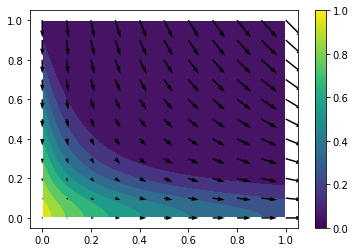

In [10]:
plt.contourf(X.T, Y.T, phi, levels=10)
plt.quiver(XX.T[::10,::10], YY.T[::10,::10], uu[::10,::10], vv[::10,::10])
plt.colorbar()


In [11]:
np.argwhere(m_w>0)

array([[ 1,  0],
       [ 1,  1],
       [ 1,  2],
       ...,
       [99, 97],
       [99, 98],
       [99, 99]])

In [12]:
count

0

In [0]:
Pe_x = np.max(Lx*uu[1:,1:]/At_P)

In [0]:
Pe_y = np.max(Ly*vv[1:,1:]/At_P)

In [15]:
Pe_y

-0.24999999999999994

In [16]:
Pe_x

40.00000000000004

In [17]:
At_P

array([[0.04 , 0.05 , 0.05 , ..., 0.05 , 0.05 , 0.065],
       [0.03 , 0.04 , 0.04 , ..., 0.04 , 0.04 , 0.055],
       [0.03 , 0.04 , 0.04 , ..., 0.04 , 0.04 , 0.055],
       ...,
       [0.03 , 0.04 , 0.04 , ..., 0.04 , 0.04 , 0.055],
       [0.03 , 0.04 , 0.04 , ..., 0.04 , 0.04 , 0.055],
       [0.035, 0.025, 0.025, ..., 0.025, 0.025, 0.06 ]])